# TASK 3 -  IRIS Flower Dataset - Unsupervised Learning

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Imporing the dataset

In [2]:
df = pd.read_csv("Iris.csv")

### getting info about data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Shuffling data so we can see data mix-up

In [4]:
from sklearn.utils import shuffle
df = shuffle(df)

In [5]:
print(df.shape)
df.head(10)


(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
138,139,6.0,3.0,4.8,1.8,Iris-virginica
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
41,42,4.5,2.3,1.3,0.3,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica
15,16,5.7,4.4,1.5,0.4,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica
17,18,5.1,3.5,1.4,0.3,Iris-setosa
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa


### Mean, Variance, Max, Min

In [24]:
df.iloc[:,1:].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### In first, check if any nan value is existing

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### Pair plot

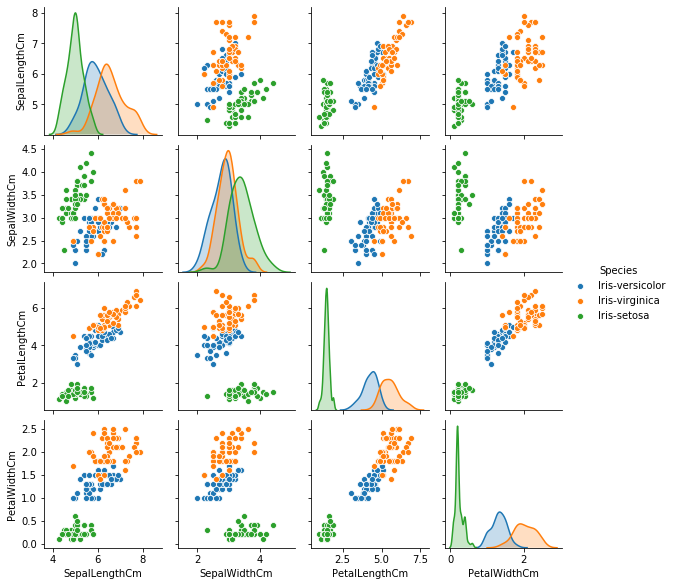

In [8]:
sns.pairplot(df.drop(axis=1,columns = ["Id"]),hue = 'Species',height=2,aspect=1)

### scatterplot for compare with prediction

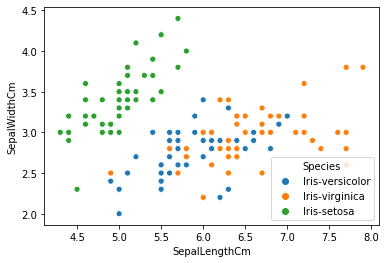

In [9]:
sns.scatterplot(x="SepalLengthCm",y ="SepalWidthCm",data=df,hue = "Species" )

### Distribution graph so we can easily predict it will be a "setosa" flower if petal length is below 2.2 cm

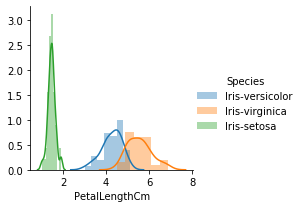

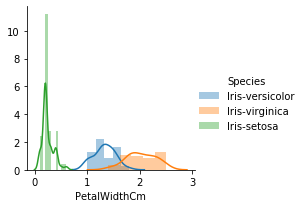

In [10]:
for i,item in enumerate(["PetalLengthCm","PetalWidthCm"]):
    g=sns.FacetGrid(df,hue = "Species",height=3)
    g.map(sns.distplot,item)
    g.add_legend()

### Relation between petal length and width, linear relationship exist for some values

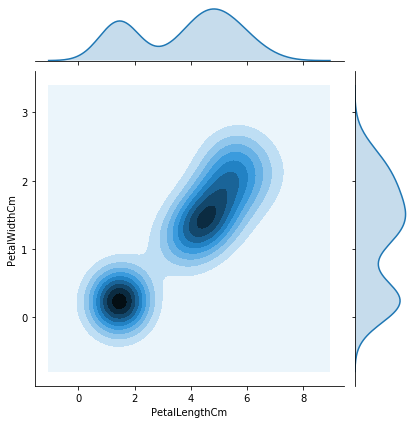

In [22]:
sns.jointplot(x = df["PetalLengthCm"],y = df["PetalWidthCm"],kind = 'kde')

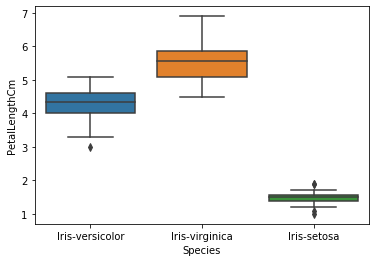

In [11]:
sns.boxplot(x = "Species",y = "PetalLengthCm",data=df )

### Distribution of data 

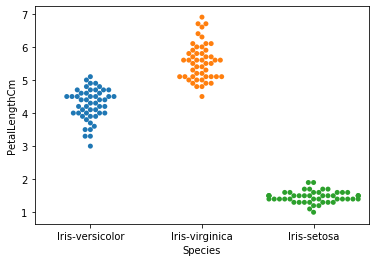

In [12]:
sns.swarmplot(x = "Species",y = "PetalLengthCm",data=df )

## Implementing Unsupervised learning

In [13]:
X = df.iloc[:,1:-1].values

In [14]:
from sklearn.cluster import KMeans

### Finding optimun number of clusters

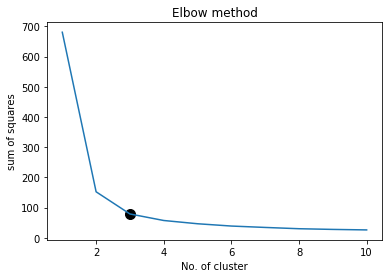

In [26]:
wcss = []
for i in range(1,11):
    kmeans  = KMeans(n_clusters = i,init = "k-means++",n_init = 10,random_state=0,max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.scatter(3,wcss[2],s = 100,c = "black")
plt.title("Elbow method")
plt.xlabel("No. of cluster")
plt.ylabel("sum of squares")
plt.show()
    

### So it is 3, make 3 cluster and visualize it

In [27]:
kmeans_opti = KMeans(n_clusters = 3,init = "k-means++",n_init = 10,random_state=0,max_iter=300)
y_means = kmeans_opti.fit_predict(X)

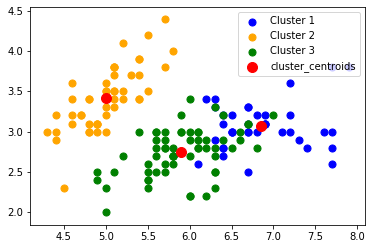

In [28]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50,c = "blue",label="Cluster 1")
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50,c = "orange",label="Cluster 2")
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50,c = "green",label="Cluster 3")
plt.scatter(kmeans_opti.cluster_centers_[:,0],kmeans_opti.cluster_centers_[:,1],s=100,c="red",label="cluster_centroids")
plt.legend()
plt.show()


### Now you can compare and guess which cluster is related to which type of flower